# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [108]:
%pylab inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from itertools import product
# load mnist dataset and split in train and test set.
digits = load_digits()

X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]

# your implementation here

scaler = StandardScaler()
scaler.fit_transform(X_train_mnist, y_train_mnist)
scaler.fit_transform(X_test_mnist, y_test_mnist)

lr = LogisticRegression()
knn = KNeighborsClassifier()
lr.fit(X_train_mnist, y_train_mnist)
knn.fit(X_train_mnist, y_train_mnist)

#print(knn.score(X_test_mnist, y_test_mnist))
print('K-Nearest Neighbors with default settings score is: ', knn.score(X_test_mnist, y_test_mnist))
print('Logistic Regression with default settings score is: ', lr.score(X_test_mnist, y_test_mnist))

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vladimir\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'clf', 'mean', 'product', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


K-Nearest Neighbors with default settings score is:  0.956228956229
Logistic Regression with default settings score is:  0.888888888889


The best number of neighbors is:  {'n_neighbors': 1}
0.978 (+/-0.047) for {'n_neighbors': 1}
0.973 (+/-0.049) for {'n_neighbors': 2}
0.975 (+/-0.045) for {'n_neighbors': 3}
0.968 (+/-0.051) for {'n_neighbors': 4}
0.969 (+/-0.043) for {'n_neighbors': 5}
0.969 (+/-0.043) for {'n_neighbors': 6}
0.967 (+/-0.044) for {'n_neighbors': 7}
0.965 (+/-0.046) for {'n_neighbors': 8}
0.963 (+/-0.054) for {'n_neighbors': 9}
0.964 (+/-0.056) for {'n_neighbors': 10}

The score on the test set with the best parameters is:  0.946127946128 



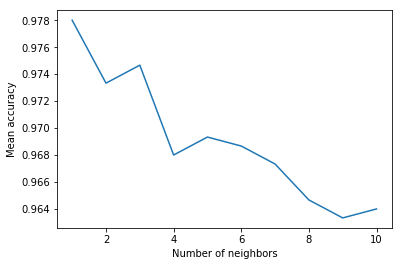

In [101]:
# 10-fold CV on knn
k_range = list(range(1, 11))
#weight_options = ['uniform', 'distance']
cv_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = dict(n_neighbors=k_range), cv=10, scoring = 'accuracy') #change cv
cv_knn.fit(X_train_mnist, y_train_mnist)

print('The best number of neighbors is: ', cv_knn.best_params_)

new_knn = KNeighborsClassifier(n_neighbors = 1)
new_knn.fit(X_train_mnist, y_train_mnist)


means_cv_knn = cv_knn.cv_results_['mean_test_score']
stds_cv_knn = cv_knn.cv_results_['std_test_score']
for mean, std, params in zip(means_cv_knn, stds_cv_knn, cv_knn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

knn_test = new_knn.score(X_test_mnist, y_test_mnist)
print('The score on the test set with the best parameters is: ', knn_test, '\n')

plt.plot(k_range, means_cv_knn)
plt.xlabel("Number of neighbors")
plt.ylabel("Mean accuracy")

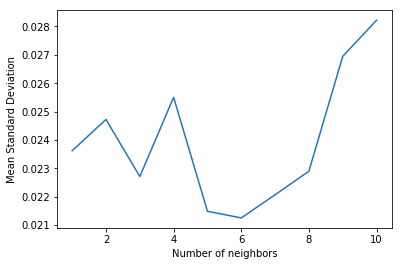

In [102]:
plt.plot(k_range, stds_cv_knn)
plt.xlabel("Number of neighbors")
plt.ylabel("Mean Standard Deviation")

In [103]:
print(classification_report(y_test_mnist, cv_knn.predict(X_test_mnist)))
confusion_matrix(y_test_mnist, cv_knn.predict(X_test_mnist))

# The confusion matrix shows how well your classifiers performs
# The diagonal numbers are well classified values and everithing else is missclassified cases
# precision is y = 1 prediction against actual y=1 cases
# recall is actual y= 1 cases against

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.91      1.00      0.95        31
          2       1.00      1.00      1.00        27
          3       0.96      0.80      0.87        30
          4       1.00      0.91      0.95        33
          5       0.88      1.00      0.94        30
          6       1.00      1.00      1.00        30
          7       0.97      1.00      0.98        30
          8       0.92      0.86      0.89        28
          9       0.85      0.90      0.88        31

avg / total       0.95      0.95      0.95       297



array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  2,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 24,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 28]])

0.911 (+/-0.061) for {'C': 0.0001, 'fit_intercept': True}
0.911 (+/-0.061) for {'C': 0.0001, 'fit_intercept': False}
0.939 (+/-0.058) for {'C': 0.0005, 'fit_intercept': True}
0.938 (+/-0.060) for {'C': 0.0005, 'fit_intercept': False}
0.943 (+/-0.055) for {'C': 0.001, 'fit_intercept': True}
0.943 (+/-0.055) for {'C': 0.001, 'fit_intercept': False}
0.947 (+/-0.050) for {'C': 0.003, 'fit_intercept': True}
0.947 (+/-0.050) for {'C': 0.003, 'fit_intercept': False}
0.951 (+/-0.043) for {'C': 0.01, 'fit_intercept': True}
0.951 (+/-0.043) for {'C': 0.01, 'fit_intercept': False}
0.951 (+/-0.039) for {'C': 0.03, 'fit_intercept': True}
0.951 (+/-0.039) for {'C': 0.03, 'fit_intercept': False}
0.953 (+/-0.036) for {'C': 0.1, 'fit_intercept': True}
0.953 (+/-0.036) for {'C': 0.1, 'fit_intercept': False}
0.946 (+/-0.038) for {'C': 0.3, 'fit_intercept': True}
0.945 (+/-0.038) for {'C': 0.3, 'fit_intercept': False}
0.943 (+/-0.036) for {'C': 1, 'fit_intercept': True}
0.943 (+/-0.036) for {'C': 1, 'fit_

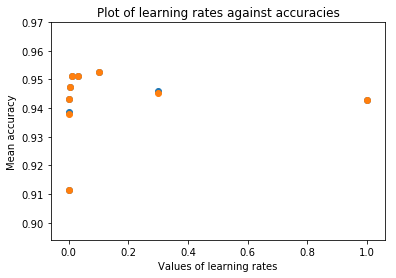

In [104]:
# 10-fold CV on log reg
Cs = [0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
p2_grid = dict(C = Cs, fit_intercept = [True, False])  #Also implemented fit_itercept as a feature for log reg
cv_lr = GridSearchCV(estimator = LogisticRegression(), param_grid = p2_grid, cv = 10)
cv_lr.fit(X_train_mnist, y_train_mnist)

means_cv_lr = cv_lr.cv_results_['mean_test_score']
stds_cv_lr = cv_lr.cv_results_['std_test_score']
for mean, std, params in zip(means_cv_lr, stds_cv_lr, cv_lr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

lr_test = cv_lr.score(X_test_mnist, y_test_mnist)
print('The score on the test set with the best parameters is: ', lr_test, '\n')
plt.title('Plot of learning rates against accuracies')
plt.scatter(Cs, means_cv_lr[::2])
plt.scatter(Cs, means_cv_lr[1::2])
plt.xlabel("Values of learning rates")
plt.ylabel("Mean accuracy")

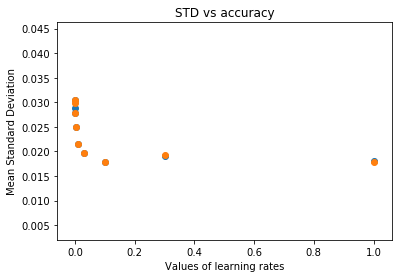

In [105]:
plt.title('STD vs accuracy')
plt.scatter(Cs, stds_cv_lr[::2])
plt.scatter(Cs, stds_cv_lr[1::2])
plt.xlabel("Values of learning rates")
plt.ylabel("Mean Standard Deviation")

In [106]:
print(classification_report(y_test_mnist, cv_lr.predict(X_test_mnist)))
confusion_matrix(y_test_mnist, cv_lr.predict(X_test_mnist))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        27
          1       0.79      0.84      0.81        31
          2       1.00      1.00      1.00        27
          3       0.86      0.63      0.73        30
          4       0.97      0.91      0.94        33
          5       0.91      0.97      0.94        30
          6       1.00      1.00      1.00        30
          7       0.90      0.90      0.90        30
          8       0.68      0.93      0.79        28
          9       0.89      0.81      0.85        31

avg / total       0.90      0.89      0.89       297



array([[26,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  2,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 19,  0,  3,  0,  2,  5,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 27,  2,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1,  2, 25]])

In [117]:
DT = DecisionTreeClassifier()
DT.fit(X_train_mnist, y_train_mnist)
print(DT.score(X_test_mnist, y_test_mnist))
prsrt = [True, False]
DT_opt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = dict(presort = prsrt), cv = 10)
DT_opt.fit(X_train_mnist, y_train_mnist)
print(DT_opt.score(X_test_mnist, y_test_mnist))
confusion_matrix (y_test_mnist, DT_opt.predict(X_test_mnist))

0.784511784512
0.767676767677


array([[26,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 18,  3,  1,  2,  0,  1,  0,  5,  1],
       [ 1,  1, 21,  2,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  1, 16,  1,  2,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  1,  0, 27,  1,  0,  0,  1],
       [ 0,  0,  1,  0,  1,  1, 25,  0,  2,  0],
       [ 0,  1,  0,  2,  0,  1,  0, 25,  0,  1],
       [ 1,  3,  1,  1,  3,  0,  0,  1, 18,  0],
       [ 0,  2,  0,  1,  0,  1,  0,  3,  2, 22]])

## Results and analysis of the experiment

# discuss the results
Unfortunately my best scores after implementing 10-fold CV on the K Nearest Neighbors Classifier are worse then implementing KNN with default settings. I am sure this could probably be fixed by a one-liner but I could not find the problem before the deadline :( I also tried it on Decision tree classifier and still got a lower score :(

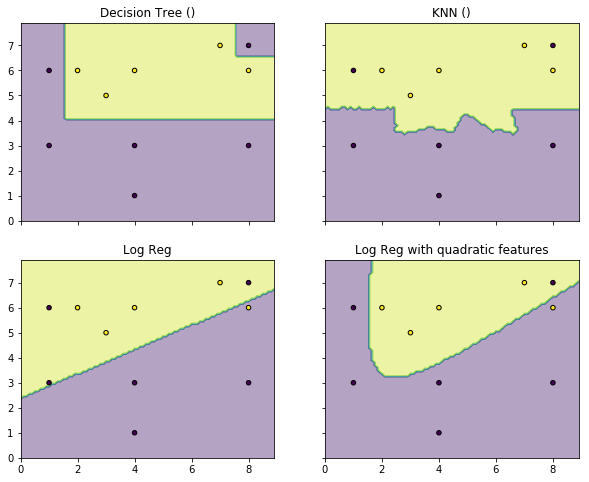

In [107]:
#plotting for part 2 of the assignment

x1 = [1, 1, 2, 3, 4, 4, 4, 7, 8, 8, 8]
x2 = [3, 6, 6, 5, 1, 3, 6, 7, 6, 7, 3]
X = reshape([item for pair in zip(x1,x2) for item in pair], (11,2))
y = [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
            
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = LogisticRegression()
eclf = make_pipeline(PolynomialFeatures(2), LogisticRegression())

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree ()', 'KNN ()',
                         'Log Reg', 'Log Reg with quadratic features']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


2) We can notice that on this particular training set the Decision Tree classifier has 100% accuracy as opposed to the others. Given a certain Classifiers perform differently according to the training set that u have. I think combining classifiers could be a good idea when you want to get less variance and bias and improve predictions but this comes with great computational disadvantage, especially if your data is very large